In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Encoding categorical variables 

# Import label encoder 
from sklearn.preprocessing import LabelEncoder
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

# Importing dataset

In [66]:
train = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/Attrition_problem_ML/dataset/train.csv")
test = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/Attrition_problem_ML/dataset/test.csv")
submission = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/Attrition_problem_ML/dataset/sample_submission.csv")

In [67]:
print(train.shape)
print(test.shape)

(1677, 35)
(1119, 34)


In [68]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

Merge train and test data

In [70]:
merged_data = pd.concat([train, test], axis=0)
merged_data.shape

(2796, 35)

# Data Pre-processing

Handling categorical variables.

In [71]:
# converting datatype int type to categorical type
int_to_object = ["Education","EmployeeCount","EnvironmentSatisfaction","StandardHours","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance",
                "JobInvolvement","JobLevel","JobSatisfaction","NumCompaniesWorked",'RelationshipSatisfaction', 'Attrition','PerformanceRating']

for i in int_to_object:
    #print(merged_data[i].value_counts())
    merged_data[i] = merged_data[i].astype('object')

# dropping columns that are homogenous, make no sense of using them 
merged_data.drop(["id","EmployeeCount","StandardHours","Over18"], axis=1,inplace=True)

In [72]:
categorical_features = merged_data.select_dtypes(exclude='number').columns.tolist()
numerical_features = merged_data.select_dtypes(include='number').columns.tolist()

Ploting categorical variables

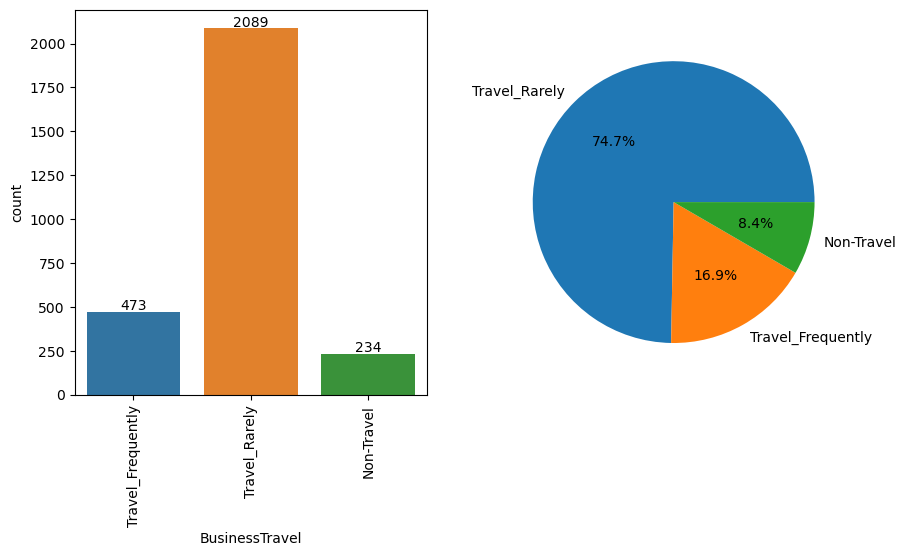

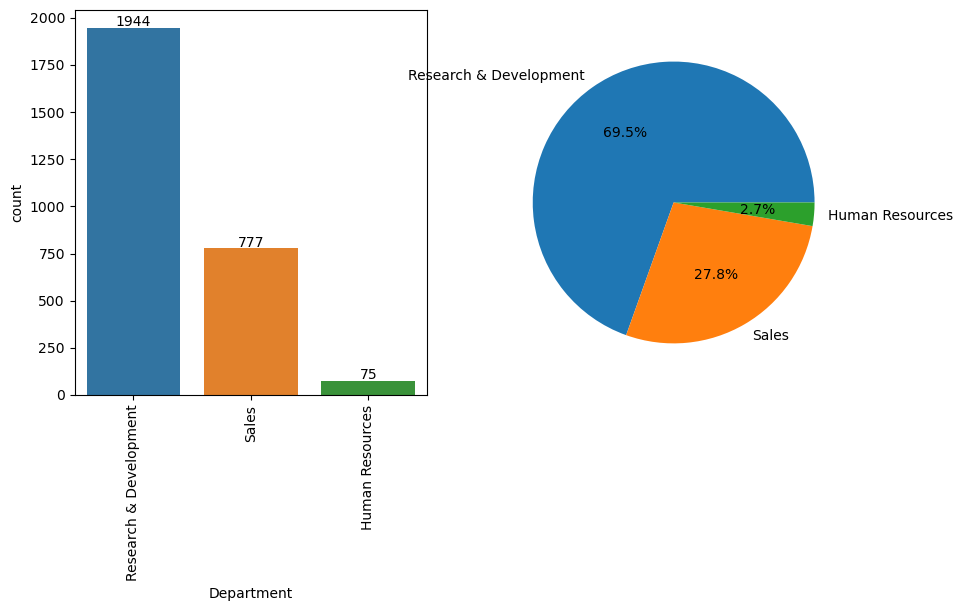

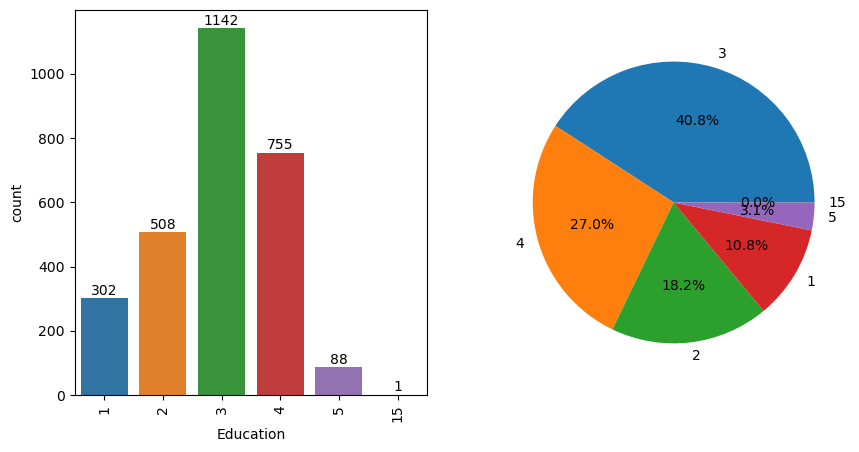

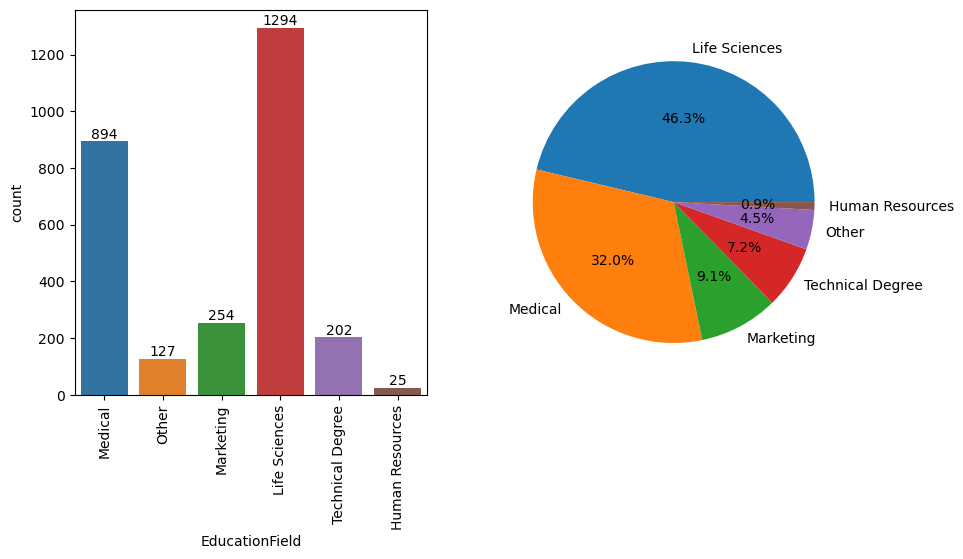

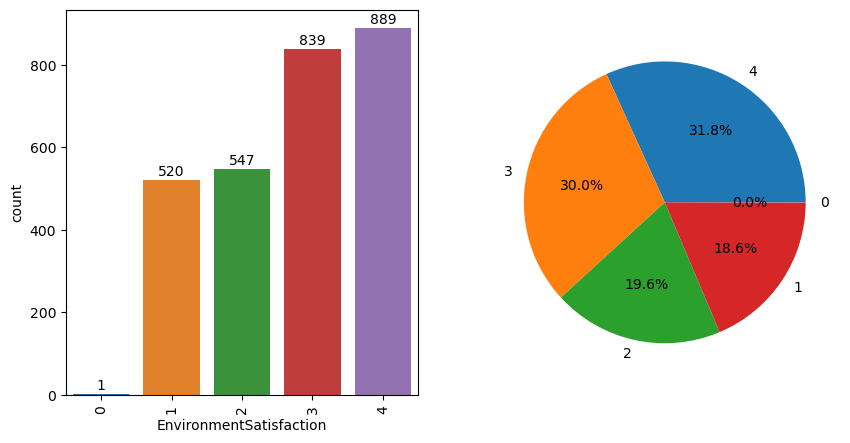

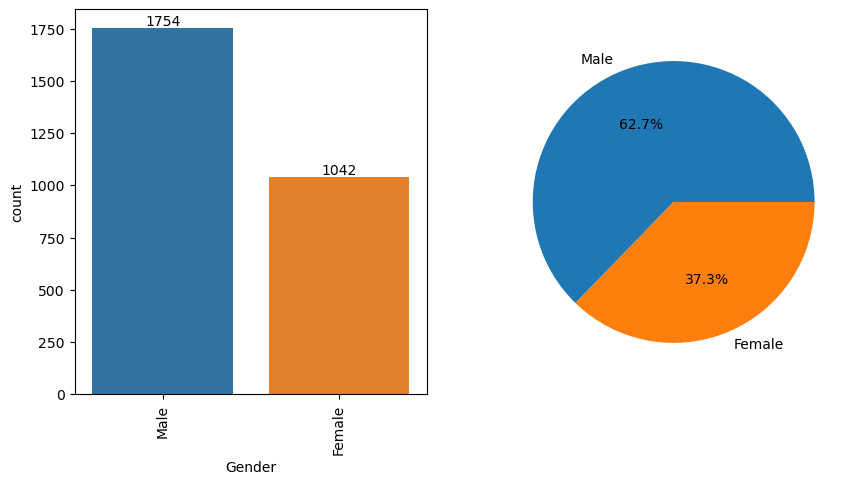

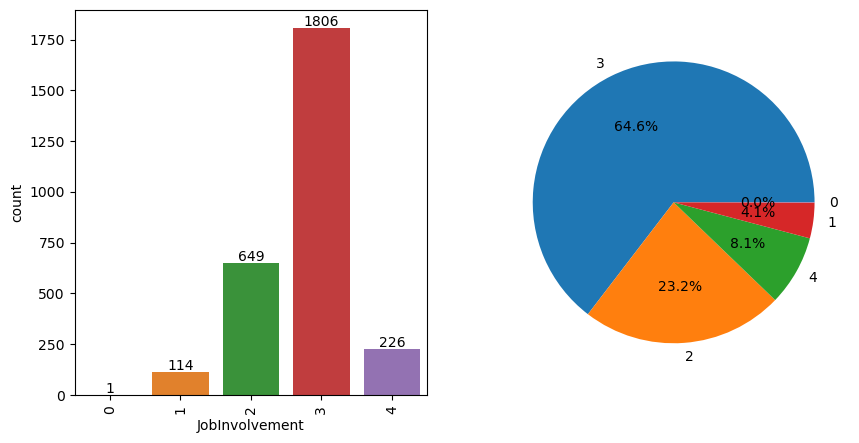

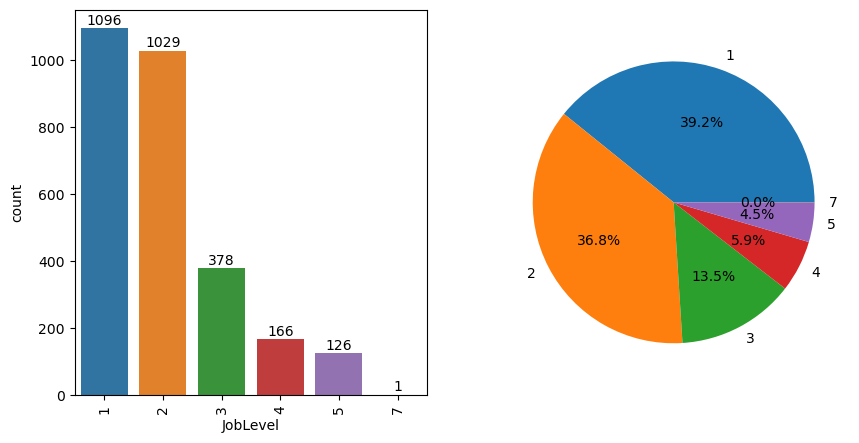

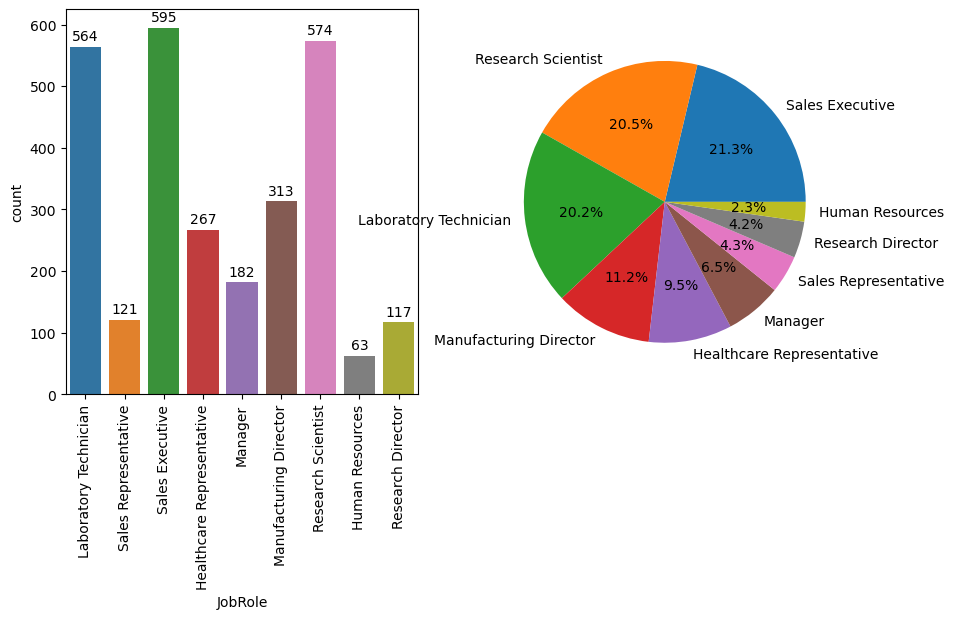

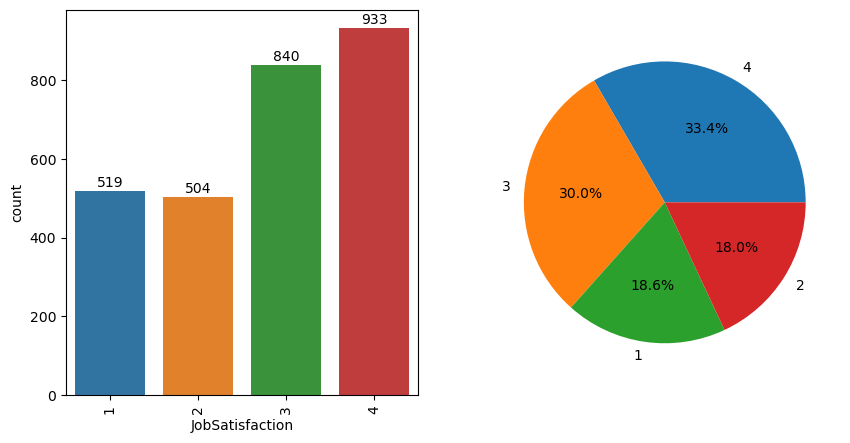

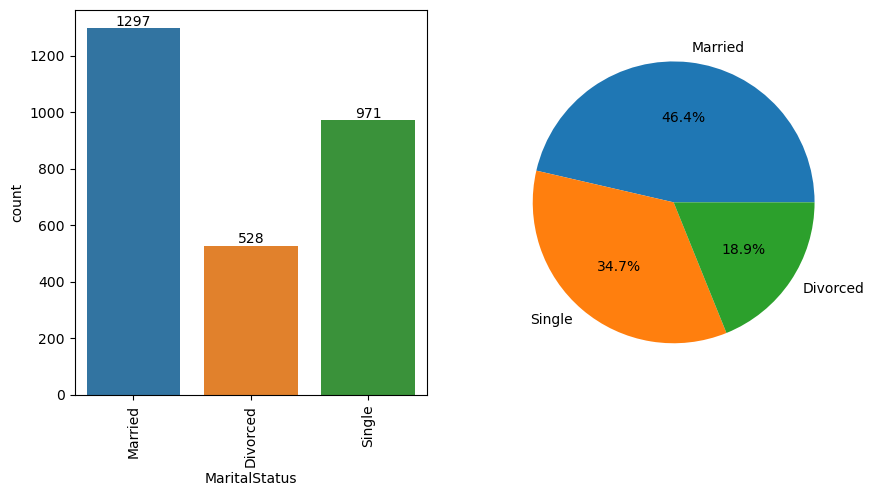

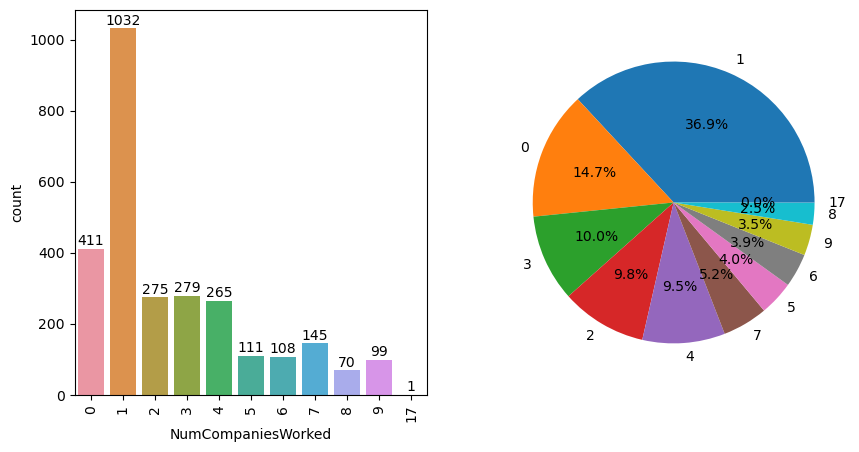

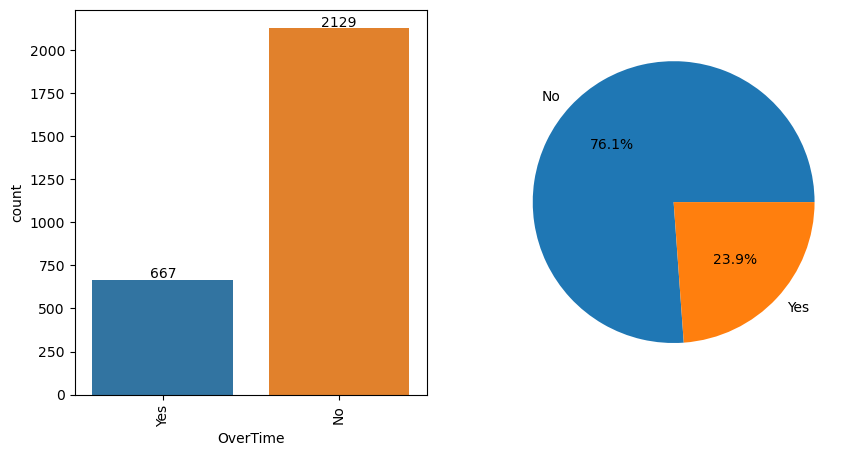

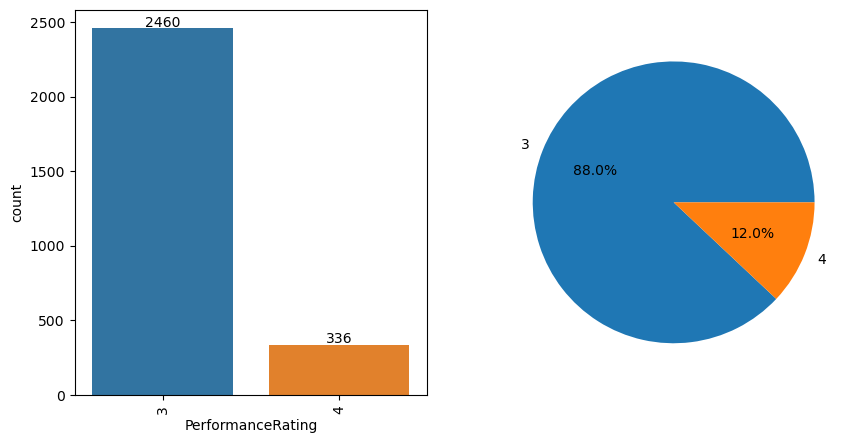

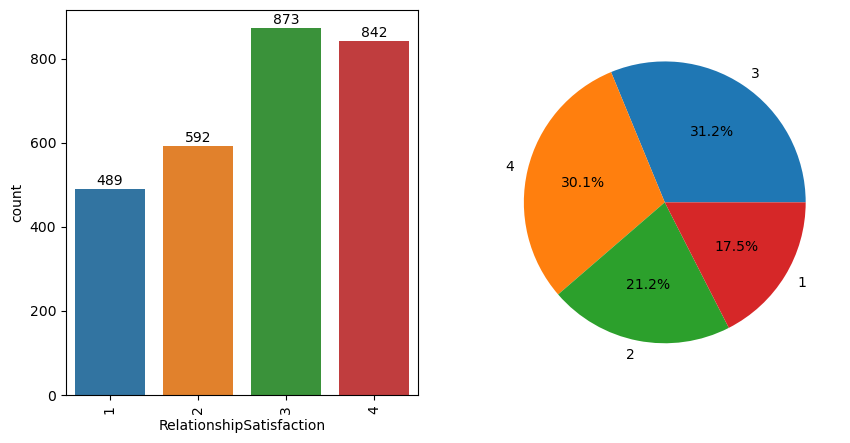

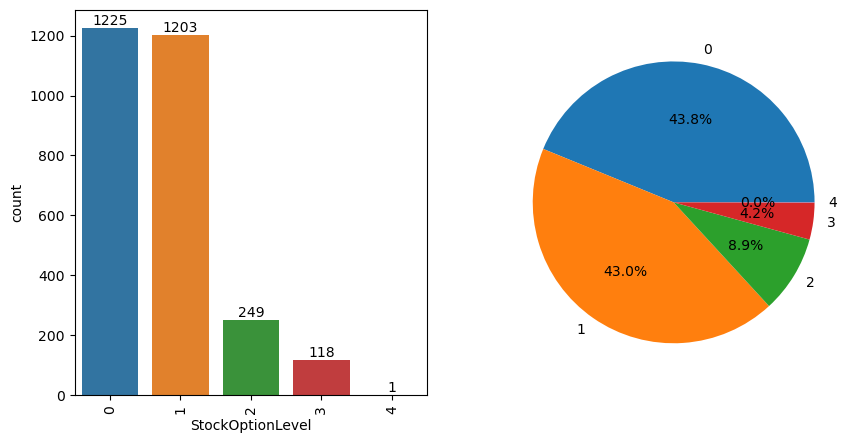

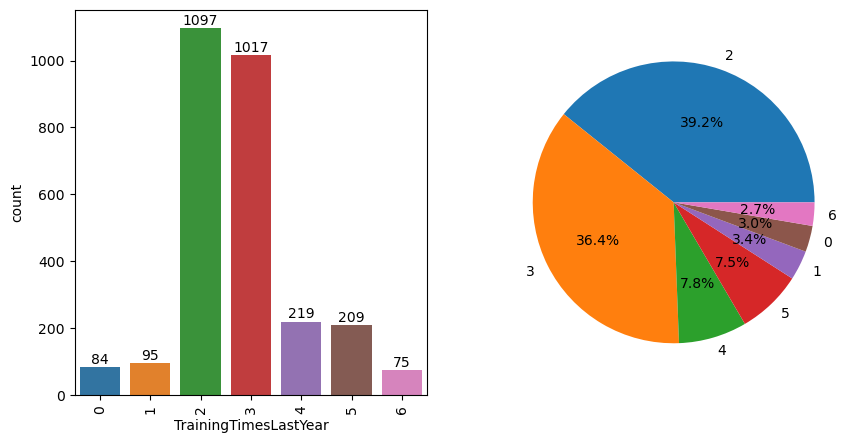

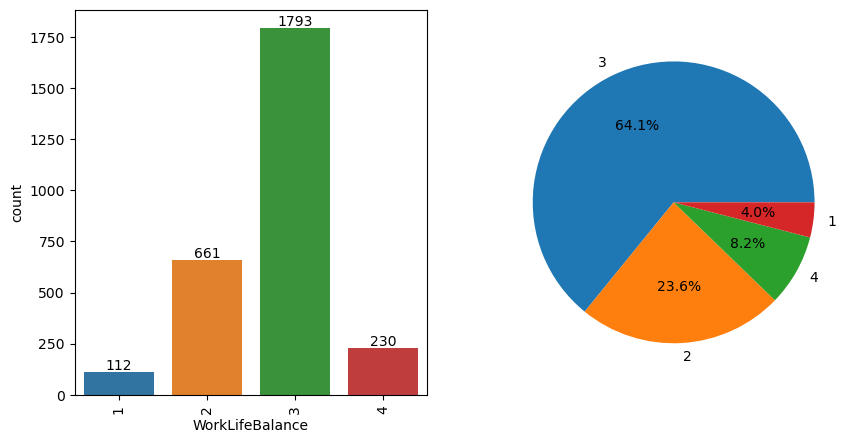

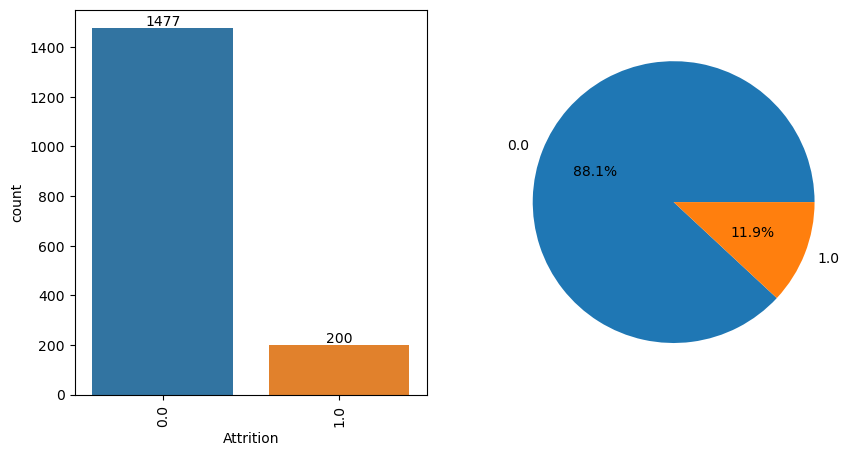

In [73]:
for var in categorical_features:
    
    #sns.countplot(data=data, x=var)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    
    # plotting bar/count plot 
    ax = sns.countplot(x=var, data=merged_data)
    # getting label for each column/bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 10, int(height), ha="center")
        plt.xticks(rotation=90)
    
    # plotting pie chart
    plt.subplot(1,2,2)
    plt.pie(merged_data[var].value_counts(),autopct='%1.1f%%',labels=merged_data[var].value_counts().keys())
    plt.show()

Handling entity in categorical columns

In [74]:
merged_data['Education'] = merged_data['Education'].apply(lambda x: 5 if x>5 else x)
merged_data['EnvironmentSatisfaction'] = merged_data['EnvironmentSatisfaction'].apply(lambda x: 1 if x==0 else x)
merged_data['StockOptionLevel'] = merged_data['StockOptionLevel'].apply(lambda x: 3 if x==4 else x)
merged_data['JobInvolvement'] = merged_data['JobInvolvement'].apply(lambda x: 1 if x==0 else x)
merged_data['JobLevel'] = merged_data['JobLevel'].apply(lambda x: 5 if x==7 else x)
merged_data['NumCompaniesWorked'] = merged_data['NumCompaniesWorked'].apply(lambda x: 8 if x==17 else x)

# categorical variables - Encoding

Ordinal

In [75]:
merged_data[categorical_features].head()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition
0,Travel_Frequently,Research & Development,3,Medical,4,Male,3,1,Laboratory Technician,4,Married,1,Yes,3,2,1,2,3,0.0
1,Travel_Rarely,Sales,3,Other,1,Male,3,1,Sales Representative,1,Married,1,No,3,4,1,3,3,0.0
2,Travel_Rarely,Sales,3,Marketing,3,Male,3,2,Sales Executive,4,Divorced,0,No,3,4,2,3,3,0.0
3,Travel_Rarely,Research & Development,3,Medical,3,Female,3,2,Healthcare Representative,1,Married,3,No,3,3,0,1,1,0.0
4,Travel_Rarely,Research & Development,4,Medical,2,Female,3,5,Manager,1,Single,1,Yes,3,3,0,0,3,1.0


In [76]:
# to filter different type of categorical variables 
#label_cat = ["JobSatisfaction","TrainingTimesLastYear","WorkLifeBalance"]
label_cat = ['Education',"EnvironmentSatisfaction", 'JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
             'RelationshipSatisfaction','TrainingTimesLastYear','WorkLifeBalance','PerformanceRating','Attrition']

# label_encoder for factors that are ordinal 
label_encoder = LabelEncoder()
# Encode labels for each column. 
for cat in label_cat:
    merged_data[cat]= label_encoder.fit_transform(merged_data[cat]) 
#merged_data[label_cat].head()

Nominal

In [77]:
ohe_cat = []
for cat in categorical_features:
    if cat not in label_cat:
        ohe_cat.append(cat)

# getting dummies 
cat_encoded = pd.get_dummies(merged_data[ohe_cat],drop_first=True)
merged_data = pd.concat([merged_data,cat_encoded], axis=1)

# Remove columns that are dummified 
merged_data.drop(ohe_cat, axis=1, inplace=True)

In [78]:
print(ohe_cat)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'StockOptionLevel']


In [79]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2796 entries, 0 to 1118
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                2796 non-null   int64
 1   DailyRate                          2796 non-null   int64
 2   DistanceFromHome                   2796 non-null   int64
 3   Education                          2796 non-null   int64
 4   EnvironmentSatisfaction            2796 non-null   int64
 5   HourlyRate                         2796 non-null   int64
 6   JobInvolvement                     2796 non-null   int64
 7   JobLevel                           2796 non-null   int64
 8   JobSatisfaction                    2796 non-null   int64
 9   MonthlyIncome                      2796 non-null   int64
 10  MonthlyRate                        2796 non-null   int64
 11  NumCompaniesWorked                 2796 non-null   int64
 12  PercentSalaryHike   

# Scaling continuous variables 

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
min_max_scale = MinMaxScaler()


#merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])
merged_data[numerical_features] = min_max_scale.fit_transform(merged_data[numerical_features])


# Separating train and test from the merged data

In [85]:
 # Get the number of rows in the train_df
num_train_rows = train.shape[0]

# Split the merged_df back into train and test dataframes
train_new = merged_data.iloc[:num_train_rows, :]
test_new = merged_data.iloc[num_train_rows:, :]

test_new=test_new.drop('Attrition', axis=1)

In [86]:
print(train_new.columns.tolist())

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single'

In [87]:
print('train:', train.shape)
print('train_new:', train_new.shape)
print('test:', test.shape)
print('test_new:', test_new.shape)

train: (1677, 35)
train_new: (1677, 44)
test: (1119, 34)
test_new: (1119, 43)


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X = train_new.drop('Attrition', axis=1)
y = train_new['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


#predictions = clf.predict(test_new)

Accuracy: 0.748015873015873


/Users/ankitbaliyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
# separate the target variable from predictors
X = train_new.drop('Attrition', axis=1)
y = train_new['Attrition']

# fit the model
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# make predictions on new data
predictions = model.predict(test_new)

submission['Attrition']=predictions
submission["Attrition"].value_counts()

/Users/ankitbaliyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    770
1    349
Name: Attrition, dtype: int64

In [62]:
submission.head()

,id,Attrition
0,1677,0
1,1678,1
2,1679,0
3,1680,0
4,1681,1


In [63]:
#submission.to_csv(r'/Users/ankitbaliyan/Documents/VS_Code/Attrition_problem_ML/output file/LR_scaled.csv', index=False)

For RandomForestClassifier

In [90]:
# separate the target variable from predictors
X = train_new.drop('Attrition', axis=1)
y = train_new['Attrition']

# fit the model
model = RandomForestClassifier(n_estimators=230,n_jobs=-1,oob_score=True,random_state=400)
model.fit(X, y)

# make predictions on new data
predictions = model.predict(test_new)

submission['Attrition']=predictions
submission["Attrition"].value_counts()

0    1105
1      14
Name: Attrition, dtype: int64